In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import time
from os import environ as env
from uuid import uuid4 as uuid

def plot_averaged_entropies(sh, gi, hh, save=False, id=0):
    shan = sh
    hill2 = hh
    gini = gi
    tmax = len(sh)
    x = np.arange(0, tmax, 1)

    fig, host = plt.subplots()
    par1 = host.twinx()
    par2 = host.twinx()
    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)

    p1, = host.plot(x, shan, "m", linewidth=0.7, label="Shannonindex")
    p2, = par1.plot(x, gini, "b", linewidth=0.7, label="GiniSimpsonindex")
    p3, = par2.plot(x, hill2, "c", linewidth=0.7, label="Hillnumber of order 2")

    host.set_xlim(0, tmax - 1)
    host.set_ylim(bottom=0)
    par1.set_ylim(bottom=0)
    par2.set_ylim(bottom=0)

    host.set_xlabel("timesteps")
    host.set_ylabel("Shannonindex")
    par1.set_ylabel("GiniSimpsonindex")
    par2.set_ylabel("Hillnumber of order 2")

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1, p2, p3]

    host.legend(lines, [l.get_label() for l in lines])
    plt.show()

    if save:
        filename = str(id) + '_comparing averaged sh, gi, hh' + '.jpg'
        plt.savefig(pathlib.Path('pictures').resolve() / filename, bbox_inches='tight')


['101_0_0476f20_offsprings.npy', '101_1_0476f20_offsprings.npy', '101_2_0476f20_offsprings.npy']


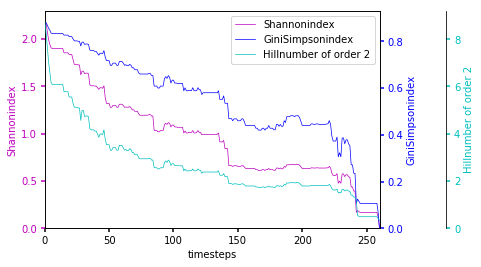

<Figure size 432x288 with 0 Axes>

In [6]:
#namen:
variante = '101'
container = '0476f20'
anz = 3

names = []
for i in range(anz):
    names.append(variante + '_' + str(i) + '_' + container + '_offsprings' +'.npy')
print(names)

#Daten einlesen:
#shannon, ginisimpson, hill2
result_sh = []
result_gi = []
result_hill2 = []
tmax = 0
counter = 0
for data in names:
    data_off = np.load('saved_data/'+ data)
    t = len(data_off)
    if t > tmax:
        result_sh = np.concatenate((result_sh, np.zeros(t - tmax)))
        result_gi = np.concatenate((result_gi, np.zeros(t - tmax)))
        result_hill2 = np.concatenate((result_hill2, np.zeros(t - tmax)))
        tmax = t
    # 'shannon':
    shannon = entropies(props=data_off, order=1, off=True)[0]
    shannon = np.concatenate((shannon, np.zeros(tmax-t)))
    result_sh = result_sh + shannon
    # 'ginisimpson':
    gini = entropies(props=data_off, order=2, off=True)
    gini = np.concatenate((gini, np.zeros(tmax-t)))
    result_gi = result_gi + gini
    # 'hill2':
    hill =  hillnumber(props=data_off, order=2, off=True)
    hill = np.concatenate((hill, np.zeros(tmax-t)))
    result_hill2 = result_hill2 + hill
    counter += 1 
    
if counter != anz:
    print('ääähm...')
    
result_sh = result_sh / counter
result_gi= result_gi / counter
result_hill2 = result_hill2 / counter

np.save('saved_data/' + variante + '_' + container + '_' + 'shannon' +'.npy', result_sh)
np.save('saved_data/' + variante + '_' + container + '_' + 'gini' +'.npy', result_gi)
np.save('saved_data/' + variante + '_' + container + '_' + 'hill2' +'.npy', result_hill2)

plot_averaged_entropies(sh=result_sh, gi=result_gi, hh=result_hill2, save=True, id=variante + '_' + container)

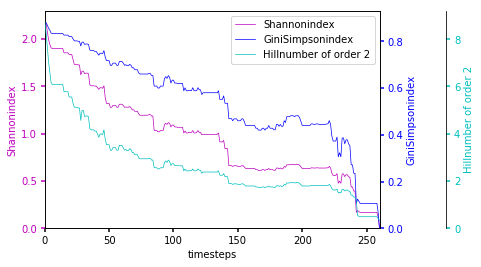

In [3]:
plot_averaged_entropies(sh=result_sh, gi=result_gi, hh=result_hill2, save=False, id=0)